### Network for project assignment Spotify 

In [5]:
import pandas as pd
import networkx as nx 

import netwulf as nw 
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
# Import data  

artist_data = pd.read_csv("data/coachella_artists.csv")
song_data = pd.read_csv("data/song_dataset_2.csv")

artist_data

,Unnamed: 0,name,id,stage,year
0,0,Beck,4obzFoKoKRHIphyHzJ35G3,Main Stage,1999
1,1,Beck,4obzFoKoKRHIphyHzJ35G3,Gobi Tent,2004
2,2,Beck,4obzFoKoKRHIphyHzJ35G3,Coachella Stage,2014
3,3,The Chemical Brothers,1GhPHrq36VKCY3ucVaZCfo,Main Stage,1999
4,4,The Chemical Brothers,1GhPHrq36VKCY3ucVaZCfo,Insomniac Tent,2001
...,...,...,...,...,...
2907,2907,Cassian,1ChtRJ3f4rbv4vtz87i6CD,Yuma Tent,2023
2908,2908,TSHA,2kLa7JZu4Ijdz1Gle2khZh,Yuma Tent,2023
2909,2909,LP Giobbi,3oKnyRhYWzNsTiss5n4Z1J,Yuma Tent,2023
2910,2910,Airrica,57sPl5iWgq5t6AscVbMTOW,Yuma Tent,2023


In [39]:
import itertools 

""" Functions from exercises week 6 - creating graphs with authors and adding attibutes. """ 

def add_attributes(graph : nx.Graph, df : pd.DataFrame): 
    for node in graph.nodes: 
        attributes = df[df["name"] == node]
        graph.add_node(node, year=attributes["year"].values)
        graph.add_node(node, stage=attributes["stage"].values)


In [10]:
""" Create a network of artits, with a link between them if they performed at the same stage, at the same year. """

from tqdm import tqdm

def create_graph(dataset):
    artists_graph = nx.Graph()
    
    grouped_data = dataset.groupby(["year", "stage"])
    
    for (year, stage), group in tqdm(grouped_data, desc="Creating graph"):
        artists_on_stage = set(group["name"])
        artists_graph.add_nodes_from(artists_on_stage)
        
        # Add links
        for artist1 in artists_on_stage:
            for artist2 in artists_on_stage:
                if artist1 != artist2:
                    artists_graph.add_edge(artist1, artist2, year=year, stage=stage)
    
    return artists_graph




Creating graph: 100%|██████████| 124/124 [00:00<00:00, 399.04it/s]


In [38]:
artists_graph = create_graph(artist_data)
add_attributes(artists_graph, artist_data, ["year", "stage"])

# Print to see if it works 
for node, attributes in artists_graph.nodes(data=True):
    print("Node:", node)
    for attribute, value in attributes.items():
        print(attribute + ":", value)


Creating graph: 100%|██████████| 124/124 [00:00<00:00, 1015.40it/s]


Node: Ming  & FS
year: [1999]
stage: ['Gobi Tent']
Node: Mr. Scruff
year: [1999]
stage: ['Gobi Tent']
Node: Mira Calix
year: [1999]
stage: ['Gobi Tent']
Node: Tomas
year: [1999]
stage: ['Gobi Tent']
Node: Neotropic
year: [1999]
stage: ['Gobi Tent']
Node: Push Button Objects
year: [1999]
stage: ['Gobi Tent']
Node: Mike Fix
year: [1999]
stage: ['Gobi Tent']
Node: Bola
year: [1999]
stage: ['Gobi Tent']
Node: Nightmares on Wax
year: [1999]
stage: ['Gobi Tent']
Node: Jega
year: [1999]
stage: ['Gobi Tent']
Node: Luke Vibert
year: [1999]
stage: ['Gobi Tent']
Node: Rob Hall
year: [1999]
stage: ['Gobi Tent']
Node: Autechre
year: [1999]
stage: ['Gobi Tent']
Node: DJ Food
year: [1999]
stage: ['Gobi Tent']
Node: Kid Koala
year: [1999]
stage: ['Gobi Tent']
Node: Andy Maddocks
year: [1999]
stage: ['Gobi Tent']
Node: Amon Tobin
year: [1999 2003 2012]
stage: ['Gobi Tent' 'Gobi Tent' 'Mojave Tent']
Node: µ-Ziq
year: [1999]
stage: ['Gobi Tent']
Node: Beck
year: [1999 2004 2014]
stage: ['Main Stage' 'Gob

In [12]:
# Visualize graph 

positions, b = nw.visualize(artists_graph)

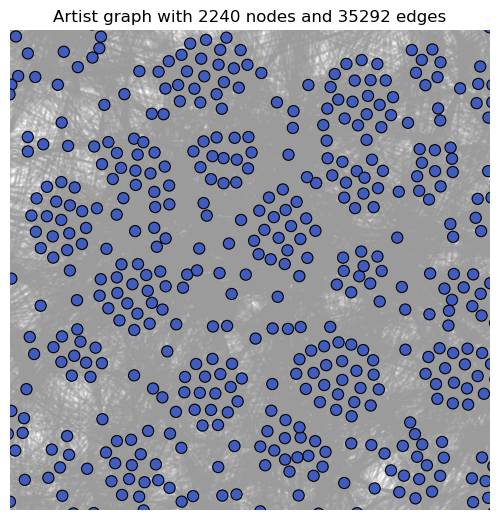

In [13]:
n, m = artists_graph.number_of_nodes(), artists_graph.number_of_edges()
fig, ax = nw.draw_netwulf(positions)
plt.title(f"Artist graph with {n} nodes and {m} edges")
plt.show()

In [24]:
""" Graph and data analysis"""

# Find artists that performed more than n, and find top N artists

def find_duplicate_artists(df, n, N): 
    count = df.groupby("name").size()
    duplicates = count[count > n]
    print(f"{len(duplicates)} artists performed more than {n} times.")
    top_artists = duplicates.nlargest(N)
    print("Top artists: ")
    for artist, nr in top_artists.items():
        print(f"{artist} performed {nr} times.")
    return duplicates, top_artists 



def calc_average_degree(graph): 
    average_degree = sum(dict(nx.degree(graph)).values()) / len(graph)
    return average_degree

average_deg_artists = calc_average_degree(artists_graph)
print(f"The average artist degree is {average_deg_artists}")

dup_artists, top_artists = find_duplicate_artists(artist_data, 3, 5)

The average artist degree is 31.510714285714286
37 artist performed more than 3 times.
Top artists: 
Alf Alpha performed 7 times.
Gabe Real performed 7 times.
The Chemical Brothers performed 7 times.
Jimbo Jenkins performed 6 times.
Richie Hawtin performed 6 times.
